In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import plotly

In [2]:
data1 = pd.read_csv('/content/A160324189_28_143_208.csv', decimal = ',' ,skiprows=3, skipfooter = 12 ,delimiter = ';', encoding = 'iso-8859-1',engine='python')
data1 = data1.replace('-', 0.0)
data1['2020/Ago'] = data1['2020/Ago'].astype('float64')
pd.options.display.float_format = '{:.2f}'.format

In [3]:
colunas_usaveis =  data1.mean().index.tolist() #Separa as colunas que, inicialmente, possuem todos os valores 
colunas_usaveis.insert(0, 'Unidade da Federação')

In [4]:
data1['Unidade da Federação'] = data1['Unidade da Federação'].str[3:]
d = {'Rondônia': 'Norte','Acre': 'Norte','Amazonas': 'Norte','Roraima': 'Norte','Pará': 'Norte'
    ,'Amapá': 'Norte','Tocantins': 'Norte','Maranhão': 'Nordeste','Piauí': 'Nordeste','Ceará': 'Nordeste'
    ,'Rio Grande do Norte': 'Nordeste','Paraíba': 'Nordeste','Pernambuco': 'Nordeste','Alagoas': 'Nordeste','Sergipe': 'Nordeste'
    ,'Bahia': 'Nordeste','Minas Gerais': 'Sudeste','Espírito Santo': 'Sudeste','Rio de Janeiro': 'Sudeste','São Paulo': 'Sudeste'
    ,'Paraná': 'Sul','Santa Catarina': 'Sul','Rio Grande do Sul': 'Sul','Mato Grosso do Sul': 'Centro-Oeste','Mato Grosso': 'Centro-Oeste'
    ,'Goiás': 'Centro-Oeste','Distrito Federal': 'Centro-Oeste'}
data1['Região'] = data1['Unidade da Federação'].map(d)

In [5]:
colunas_obj =  list(data1.select_dtypes(include=['object']).columns)
colunas_obj.remove('Unidade da Federação')
colunas_obj.remove('Região')
data1[colunas_obj] = data1[colunas_obj].astype('float64') #Deixando o dataframe completo com todas as colunas em Float64

In [6]:
data1.dtypes

Unidade da Federação     object
1992/Mar                float64
1992/Abr                float64
1993/Mai                float64
1993/Dez                float64
                         ...   
2020/Jun                float64
2020/Jul                float64
2020/Ago                float64
Total                   float64
Região                   object
Length: 281, dtype: object

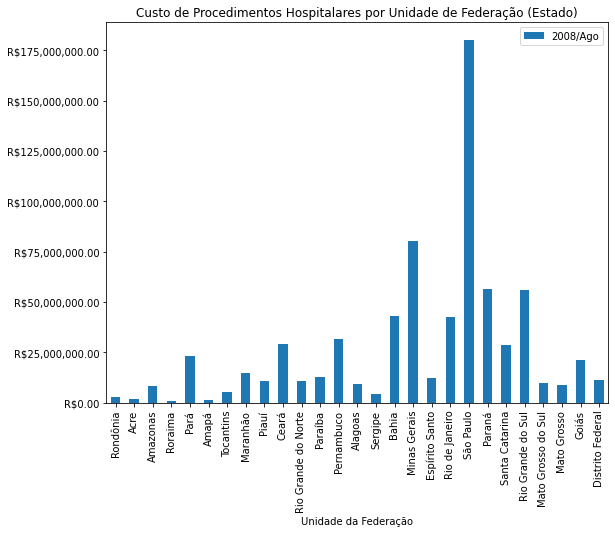

In [7]:
ax = data1.plot(x='Unidade da Federação', y = '2008/Ago', kind ='bar', figsize=(9, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.title("Custo de Procedimentos Hospitalares por Unidade de Federação (Estado)")
plt.show()

In [8]:
usaveis =  data1[colunas_usaveis] #informação que o dataframe possui quando todos os estados tem valores

In [9]:
usaveis = usaveis.set_index('Unidade da Federação')

In [10]:
usaveis = usaveis.drop('Total', axis = 1) #Remove a coluna total para análise em séries

In [11]:
values =  usaveis.mean()

In [12]:
values.idxmax(axis=0)

'2008/Jan'

# ANALISANDO VALORES OUTLIERS

In [13]:
teste =  usaveis[['2007/Dez','2008/Jan','2009/Fev',]]

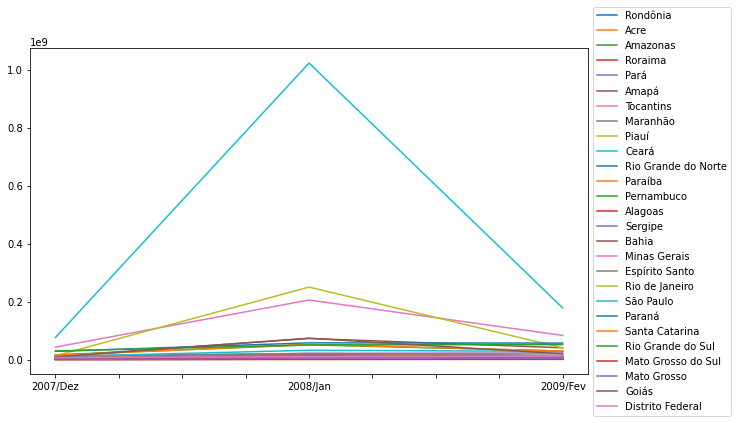

In [14]:
teste.T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Criando uma análise através de um percentual de crescimento

In [15]:
teste['percentual'] =  (teste['2008/Jan']-teste['2007/Dez'])/teste['2007/Dez']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Setando que o valores "real" deve ser a média dos outros dois valores se o percentual de crescimento de jan em relação a dezembro for maior que 2.5

In [16]:
teste.loc[teste['percentual'] > 2.5, '2008/Jan'] = ((teste['2007/Dez']+teste['2009/Fev'])/2) ##Forçadamente coloca valores

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
teste['percentual_novo'] =  (teste['2008/Jan']-teste['2007/Dez'])/teste['2007/Dez']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



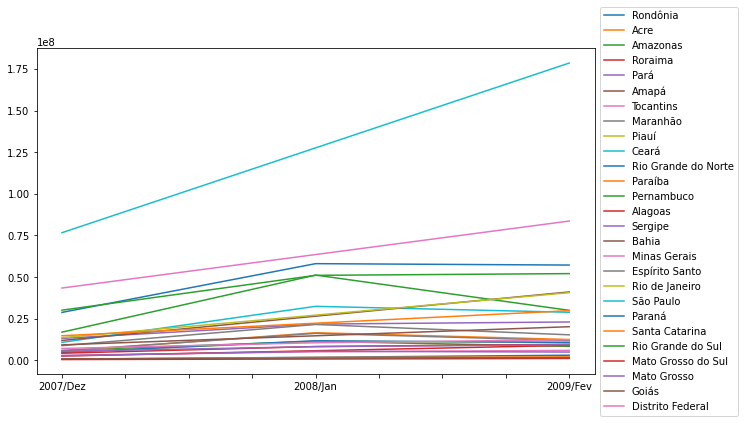

In [18]:
teste = teste.drop(['percentual_novo','percentual' ], axis = 1) #
teste.T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Voltando a base de dados original

In [19]:
usaveis['percentual'] =  (usaveis['2008/Jan']-usaveis['2007/Dez'])/usaveis['2007/Dez']
usaveis.loc[usaveis['percentual'] > 2.5, '2008/Jan'] = ((usaveis['2007/Dez']+usaveis['2009/Fev'])/2) ##Forçadamente coloca valores
usaveis['percentual_novo'] =  (usaveis['2008/Jan']-usaveis['2007/Dez'])/usaveis['2007/Dez']
usaveis = usaveis.drop(['percentual_novo','percentual' ], axis = 1) #

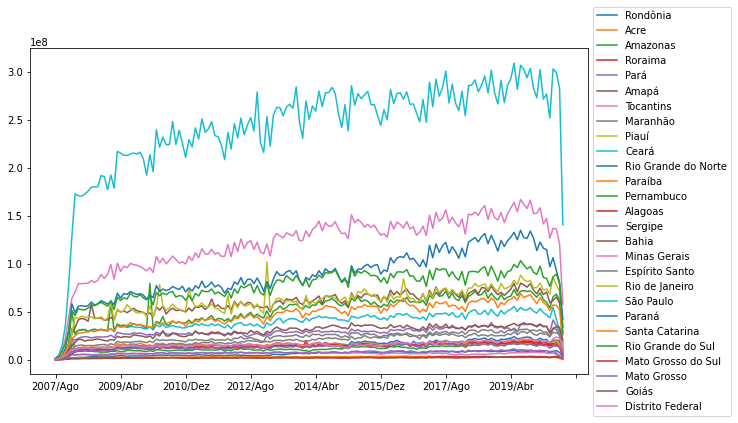

In [20]:
usaveis.T.plot(figsize =(10, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [21]:
## Problema em '2008/Jan', nos estados:São Paulo, Rio de Janeiro, Distrito Federal

In [22]:
## Melhorar a legenda
## Selecionar os 5 estados

In [23]:
Estados =  usaveis.loc[['São Paulo', 'Maranhão', 'Amazonas', 'Distrito Federal', 'Rio de Janeiro']]

In [24]:
Estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,127632462.10,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,14553978.06,14536700.20,14609872.57,15317881.85,15617699.59,15643973.86,14644528.47,16509174.38,15323800.01,19000528.61,17947811.13,18274483.44,18108112.36,18026071.20,18566524.68,18710607.19,19044993.31,18373019.22,17558736.88,19282093.56,17569101.52,21316090.03,19804547.24,20646225.47,19887224.90,20272804.23,20504334.40,20002266.78,19676260.18,19181018.80,...,29026652.11,27315185.49,28479060.68,29340983.81,27271119.78,28743285.70,28083157.75,27083233.19,29401736.85,26330254.03,29895181.77,30897068.02,30281504.24,28453973.46,30806965.30,30838532.57,29976987.17,30994778.85,28237905.90,27802462.95,30160826.23,27614666.06,30322908.98,30475196.99,32603116.94,29832196.37,31269773.20,31374191.37,31588787.38,30157243.62,30849081.57,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,10916718.78
Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,1235

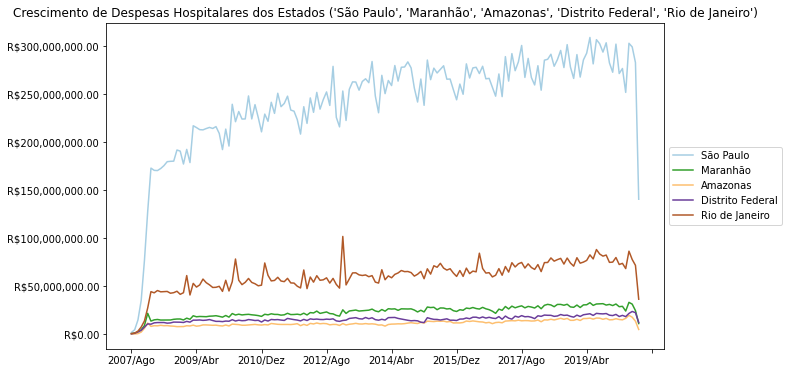

In [25]:
ax = Estados.T.plot(figsize =(10, 6) ,colormap='Paired')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Crescimento de Despesas Hospitalares dos Estados ('São Paulo', 'Maranhão', 'Amazonas', 'Distrito Federal', 'Rio de Janeiro')")
plt.show()

# Desafio Mudar as cores do pallet

In [26]:
import numpy as np
np.random.seed(687942)
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,10824255.26
Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,63552318.69,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45,8080160.97
Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6022437.54,598

## Revisar entrada de dados da Dengue

In [27]:
dengue = "https://info.dengue.mat.br/api/alertcity/?geocode=3304557&disease=dengue&format=csv&ew_start=01&ey_start=2008&ew_end=50&ey_end=2020"
dfdengue = pd.read_csv(dengue,sep=",",thousands=".", decimal=",", na_values = '-' )

In [35]:
dfdengue

,id,aps,se,data,tweets,casos,casos_est,casos_estmin,casos_estmax,tmin,rt,prt1,inc,nivel,sum
0,1870,10,201518,2015-05-03,5980.00,580.00,580.00,580.00,580.00,210.00,14033.00,953869.00,255548.00,3,1302
1,354600,53,201814,2018-04-01,440.00,190.00,190.00,190.00,190.00,244286.00,113977.00,653529.00,515556.00,2,1302
2,931875,10,202041,2020-10-04,280.00,0.00,0.00,0.00,0.00,235714.00,0.00,0.00,0.00,1,1302
3,898427,10,202033,2020-08-09,960.00,10.00,10.00,10.00,10.00,217143.00,143876.00,61769.00,4406.00,1,1302
4,932437,21,202041,2020-10-04,280.00,0.00,0.00,0.00,0.00,235714.00,0.00,0.00,0.00,1,1302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,328890,53,201808,2018-02-18,180.00,60.00,60.00,60.00,60.00,255714.00,866775.00,395452.00,162807.00,1,1302
5640,333150,53,201809,2018-02-25,150.00,80.00,80.00,80.00,80.00,250.00,127122.00,679224.00,217076.00,2,1302
5641,337420,53,201810,2018-03-04,300.00,140.00,140.00,140.00,140.00,252857.00,20272.00,945226.00,379884.00,2,1302
5642,345990,53,201812,2018-03-18,310.00,160.00,160.00,160.00,160.00,255714.00,131972.00,771301.00,434153.00,2,1302


In [36]:
df = dfdengue[['data', 'casos']]

In [37]:
df

,data,casos
0,2015-05-03,580.00
1,2018-04-01,190.00
2,2020-10-04,0.00
3,2020-08-09,10.00
4,2020-10-04,0.00
...,...,...
5639,2018-02-18,60.00
5640,2018-02-25,80.00
5641,2018-03-04,140.00
5642,2018-03-18,160.00


In [38]:
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df['anomes'] = df['data'].dt.strftime('%Y%m')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df = df.drop(['data'], axis=1)

In [49]:
df = df.groupby(['anomes'], as_index=False)['casos'].sum()

In [60]:
df = df[['anomes', 'casos']].sort_values(by='anomes')

In [65]:
df.max

<bound method DataFrame.max of      anomes   casos
0    197001   70.00
1    201001 1670.00
2    201002 1910.00
3    201003 2300.00
4    201004 2510.00
..      ...     ...
126  202006  650.00
127  202007  700.00
128  202008  460.00
129  202009  390.00
130  202010   70.00

[131 rows x 2 columns]>

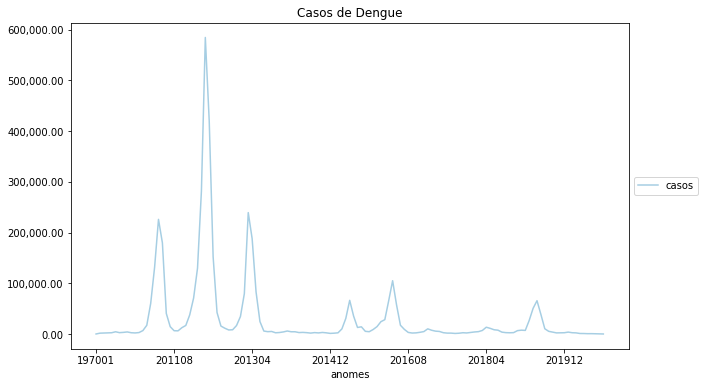

In [62]:
ax = df.plot(x='anomes', y='casos',figsize =(10, 6) ,colormap='Paired')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Casos de Dengue")
plt.show()

In [ ]:
#

In [74]:
df.max

<bound method DataFrame.max of      anomes   casos
0    197001   70.00
1    201001 1670.00
2    201002 1910.00
3    201003 2300.00
4    201004 2510.00
..      ...     ...
126  202006  650.00
127  202007  700.00
128  202008  460.00
129  202009  390.00
130  202010   70.00

[131 rows x 2 columns]>

In [71]:
teste = df[df['anomes'] == '202010']

In [72]:
teste

,anomes,casos
130,202010,70.00
